# Purpose

Overlay 2 images in one plot, with the top image having selected regions of transparency.

In [254]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

print(mpl.__version__)

3.3.2


# Background image

In [46]:
n_x, n_y = 500, 400

background = np.zeros((n_y, n_x))
background[:, 50:] = np.linspace(0, 0.5, 450)
temp = np.linspace(0, 0.5, 400)
# print(temp)
for i in range(0, n_x):
    background[:, i] += temp
background[100:150, 200:350] = 0
    
background.shape

(400, 500)

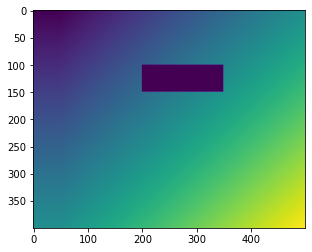

In [47]:
fig, ax = plt.subplots()
ax.imshow(background)

# Foreground image overlaid on background image

In [48]:
foreground = np.zeros((n_y, n_x, 4)) + 0.8
foreground[:, :, 3] = 0
foreground[50:150, 50:150, 3] = 1
foreground[220:280, 350:470, 3] = 1
foreground.shape

(400, 500, 4)

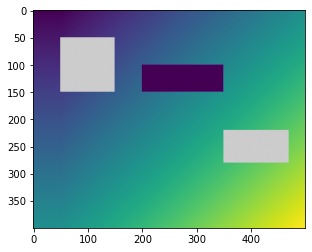

In [49]:
fig, ax = plt.subplots()
ax.imshow(background)
ax.imshow(foreground);

# Foreground image only where background image = 0

## Simple example - 1 region of zeros

### Background image

(400, 500)


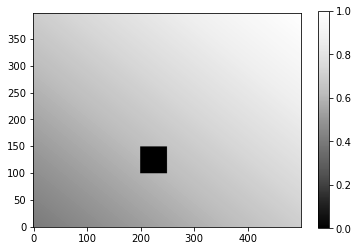

In [200]:
n_x, n_y = 500, 400

background = np.zeros((n_y, n_x))
background[:, :] = np.linspace(0.2, 0.5, 500)
temp = np.linspace(0.2, 0.5, 400)
# print(temp)
for i in range(0, n_x):
    background[:, i] += temp
background[100:150, 200:250] = 0

print(background.shape)

fig, ax = plt.subplots()
im = ax.imshow(background, origin='lower', cmap='Greys_r') #, vmin=0, vmax=1)
fig.colorbar(im);

### Foreground image and plot on top of background

2 2500 2500


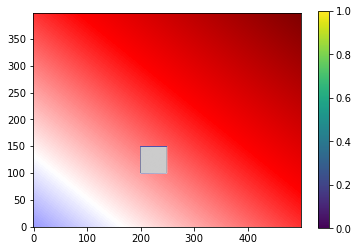

In [201]:
foreground = np.zeros((n_y, n_x, 4))

temp = np.where(background == 0)
print(len(temp), len(temp[0]), len(temp[1]))
# temp

# indices = [[y, x] for y, x in zip(temp[0], temp[1])]
grey_value = 0.8
foreground[np.ix_(*temp)] = [grey_value, grey_value, grey_value, 1]
# foreground[np.ix_(temp[0], temp[1])] = [grey_value, grey_value, grey_value, 1]

fig, ax = plt.subplots()
ax.imshow(background, origin='lower', cmap="seismic")
im = ax.imshow(foreground, origin='lower')
fig.colorbar(im);

## Another example

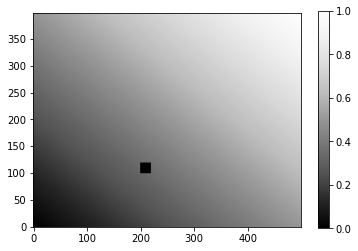

In [205]:
n_x, n_y = 500, 400

background = np.zeros((n_y, n_x))
background[:, :] = np.linspace(0, 0.5, 500)
temp = np.linspace(0, 0.5, 400)
# print(temp)
for i in range(0, n_x):
    background[:, i] += temp
background[100:120, 200:220] = 0
    
fig, ax = plt.subplots()
im = ax.imshow(background, origin='lower', cmap='Greys_r') #, vmin=0, vmax=1)
fig.colorbar(im);

2 4480 4480


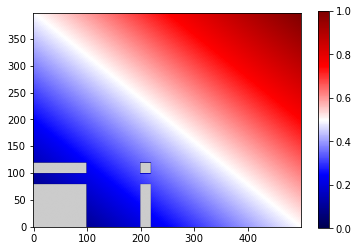

In [206]:
foreground = np.zeros((n_y, n_x, 4))

temp = np.where(background < 1e-1)
print(len(temp), len(temp[0]), len(temp[1]))
# temp

# indices = [[y, x] for y, x in zip(temp[0], temp[1])]
grey_value = 0.8
foreground[np.ix_(*temp)] = [grey_value, grey_value, grey_value, 1]
# foreground[np.ix_(temp[0], temp[1])] = [grey_value, grey_value, grey_value, 1]

fig, ax = plt.subplots()
im = ax.imshow(background, origin='lower', cmap="seismic")
ax.imshow(foreground, origin='lower');
fig.colorbar(im);

## Figure out `np.indices` and radial distance 2D array

In [207]:
np.indices((4,5))

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [208]:
indices_y, indices_x = np.indices((4,5))
indices_y

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3]])

In [209]:
indices_x

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [210]:
temp = np.sqrt(indices_x**2 + indices_y**2)
temp

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ]])

In [211]:
np.max(temp)

5.0

In [212]:
temp /= np.max(temp)
temp

array([[0.        , 0.2       , 0.4       , 0.6       , 0.8       ],
       [0.2       , 0.28284271, 0.4472136 , 0.63245553, 0.82462113],
       [0.4       , 0.4472136 , 0.56568542, 0.72111026, 0.89442719],
       [0.6       , 0.63245553, 0.72111026, 0.84852814, 1.        ]])

## Example - normalized radial distance background image

(400, 500)


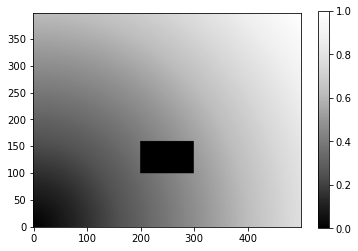

In [234]:
n_x, n_y = 500, 400

indices_y, indices_x = np.indices((n_y, n_x))
background = np.sqrt(indices_x**2 + indices_y**2)
background /= np.max(background)
print(background.shape)

background[100:160, 200:300] = 0
    
fig, ax = plt.subplots()
im = ax.imshow(background, origin='lower', cmap='Greys_r') #, vmin=0, vmax=1)
fig.colorbar(im);

2 6001 6001


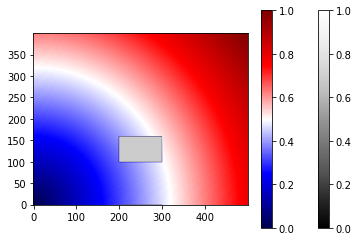

In [235]:
foreground = np.zeros((n_y, n_x, 4))

temp = np.where(background < 1e-5)
print(len(temp), len(temp[0]), len(temp[1]))

grey_value = 0.8
foreground[np.ix_(*temp)] = [grey_value, grey_value, grey_value, 1]
# foreground[np.ix_(temp[0], temp[1])] = [grey_value, grey_value, grey_value, 1]

fig, ax = plt.subplots()
im = ax.imshow(background, origin='lower', cmap="seismic")
im_f = ax.imshow(foreground, origin='lower', cmap="Greys_r");
fig.colorbar(im_f);
fig.colorbar(im);

In [237]:
# fig, ax = plt.subplots()
# lim = 250
# temp_max = np.max(background[:lim, :lim])
# print(temp_max)
# im = ax.imshow(background, origin='lower', cmap='Greys_r', vmin=0, vmax=temp_max)
# ax.set_xlim(0, lim)
# ax.set_ylim(0, lim)
# fig.colorbar(im);

## Try method in this matplotlib documentation example

See [Blend transparency with color in 2D images](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_transparency_blend.html), section *Blending in transparency*.

(400, 500)


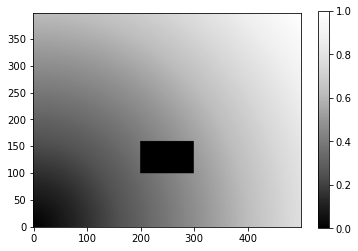

In [238]:
n_x, n_y = 500, 400

indices_y, indices_x = np.indices((n_y, n_x))
background = np.sqrt(indices_x**2 + indices_y**2)
background /= np.max(background)
print(background.shape)

background[100:160, 200:300] = 0
    
fig, ax = plt.subplots()
im = ax.imshow(background, origin='lower', cmap='Greys_r') #, vmin=0, vmax=1)
fig.colorbar(im);

2 6001 6001


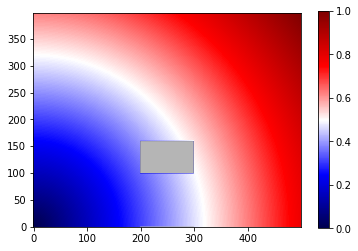

In [267]:
grey_value = 0.6
foreground = np.ones((n_y, n_x)) * grey_value

temp = np.where(background < 1e-5)
print(len(temp), len(temp[0]), len(temp[1]))

alphas = np.zeros(foreground.shape, dtype=np.float)
alphas[np.ix_(*temp)] = 1
# foreground[np.ix_(temp[0], temp[1])] = [grey_value, grey_value, grey_value, 1]

fig, ax = plt.subplots()
im = ax.imshow(background, origin='lower', cmap="seismic")
im_f = ax.imshow(foreground, alpha=alphas, origin='lower', cmap="Greys_r", vmin=0, vmax=1);
# fig.colorbar(im_f);
fig.colorbar(im);

This isn't it: [Setting alpha as an array in plt.imshow() makes the plot crashe](https://stackoverflow.com/questions/64091495/setting-alpha-as-an-array-in-plt-imshow-makes-the-plot-crashe).

But this is: [colorbar TypeError when combined with array alpha-blended imshow #19006](https://github.com/matplotlib/matplotlib/issues/19006).